In [38]:
from pylab import*
from scipy.integrate import*
%matplotlib inline

In [78]:
#y_v[0]=y, y_v[1]=v
def osc(y_v,t,omega2=1.):
    dy= y_v[1]
    dv= -omega2*y_v[0]-0.01*y_v[1]
    return array ([dy,dv])

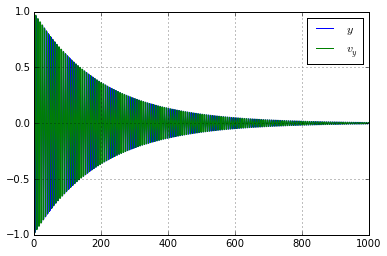

In [79]:
t = linspace(0,1000,10000)
ini = array([0.,1.])
sol = odeint(osc,ini,t)
plot(t,sol[:,0],label='$y$')
plot(t,sol[:,1],label='$v_y$')
grid()
legend()
show()

In [80]:
def root_trayec1(fun,p_i,ti,error=1e-5):
    while abs(p_i[0])> error:
        bla = ti -(p_i[0]/p_i[1])
        paso = odeint(fun,p_i,[ti,bla])
        ti,p_i=bla,paso[-1]
    return ti,p_i

In [81]:
x = 10 
ti,pto_i = t[x],sol[x]
t_raiz,pto =root_trayec1(osc,pto_i,ti)
print t_raiz,pto

-5.86610299116e-09 [ -8.77502376e-11   9.99999947e-01]


In [82]:
num = len(t)
raices =zeros(num)
puntos =zeros((num,2))
j=0
for i in range(len(t)-1):
    if (sol[i][0]*sol[i+1][0]) < 0:
        raices[j],puntos[j] = root_trayec1(osc,sol[i],t[i])
        j+=1
raices = raices[0:j]
print raices

[   3.14163204    6.283264      9.42489763   12.5665279    15.7081597
   18.84979178   21.99142372   25.13306048   28.2746876    31.41631941
   34.55795148   37.69958342   40.84122552   43.9828473    47.12447984
   50.26611118   53.40774307   56.54937506   59.691007     62.83264155
   65.97427088   69.11590263   72.25753476   75.39916665   78.54080511
   81.68243053   84.82406254   87.96569441   91.10732635   94.2489711
   97.39059023  100.53222336  103.67385409  106.81548597  109.95711796
  113.09874989  116.24038564  119.38201376  122.52364556  125.66527762
  128.80690956  131.94855     135.09017343  138.23180571  141.3734373
  144.51506926  147.656717    150.79833312  153.93996701  157.08159699
  160.22322883  163.36486088  166.50649281  169.64813001  172.7897567
  175.9313886   179.07302059  182.21465253  185.35629532  188.49791642
  191.63954915  194.78118035  197.92281226  201.06446349  204.20607618
  207.34771104  210.48934008  213.63097187  216.77260399  219.91423593
  223.0558

#### El espacio fase

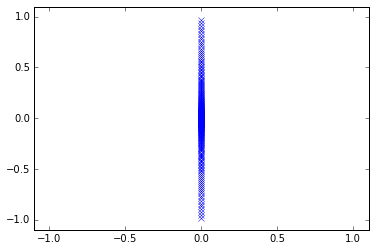

In [83]:
xlim([-1.1,1.1]),ylim([-1.1,1.1])
plot(puntos[:,0],puntos[:,1],'x')
show()